-----------
Initializing structure...
time for choose_chunkdivision = 0.000403166 s
Working in 2D dimensions.
Computational cell is 40 x 40 x 0 with resolution 10
     cylinder, center = (0,0,0)
          radius 10, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,-10.6,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     cylinder, center = (0,0,0)
          radius 9, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.421155 s
-----------
MPB solved for frequency_1(0.34641,0,0) = 0.102694 after 8 iters
MPB solved for frequency_1(0.337313,0,0) = 0.0999999 after 5 iters
MPB solved for frequency_1(0.337314,0,0) = 0.1 after 1 iters
Meep progress: 508.25/2000.0 = 25.4% done in 4.0s, 11.7s to go
on time step 10165 (time=508.25), 0.000393547 s/step
Meep progress: 1019.8000000000001/200

/Users/sunping/miniconda3/envs/MEEP/lib/python3.11/site-packages/meep/visualization.py:1446: UserWarning: Warning: The 'sim' argument in Animate2D is deprecated and has no effect. It will be removed in a future release.
  warnings.warn(


on time step 40280 (time=2014), 0.000416307 s/step
Meep progress: 249.0/4000.0 = 6.2% done in 4.0s, 60.4s to go
on time step 45318 (time=2265.9), 0.000794003 s/step
Meep progress: 498.0/4000.0 = 12.4% done in 8.0s, 56.3s to go
on time step 50292 (time=2514.6), 0.00080419 s/step
Meep progress: 749.0/4000.0 = 18.7% done in 12.0s, 52.1s to go
on time step 55305 (time=2765.25), 0.000797929 s/step
Meep progress: 1000.1500000000001/4000.0 = 25.0% done in 16.0s, 48.0s to go
on time step 60329 (time=3016.45), 0.000796183 s/step
Meep progress: 1246.0/4000.0 = 31.1% done in 20.0s, 44.3s to go
on time step 65240 (time=3262), 0.00081583 s/step
Meep progress: 1497.2000000000003/4000.0 = 37.4% done in 24.0s, 40.2s to go
on time step 70270 (time=3513.5), 0.00079524 s/step
Meep progress: 1746.0/4000.0 = 43.6% done in 28.0s, 36.2s to go
on time step 75200 (time=3760), 0.000812227 s/step
Meep progress: 1992.9/4000.0 = 49.8% done in 32.0s, 32.3s to go
Normalizing field data...
run 1 finished at t = 4000.

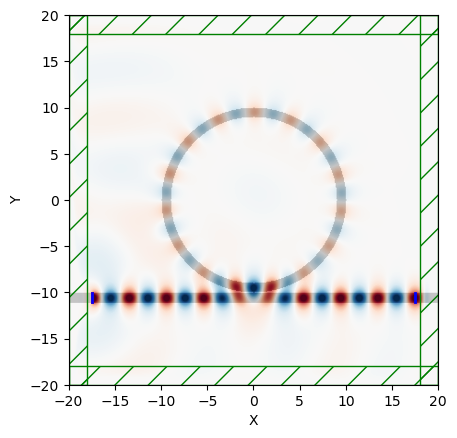

In [15]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parameters for the ring resonator
ring_outer_radius = 10  # outer radius of the ring
ring_width = 1  # width of the ring
ring_inner_radius = ring_outer_radius - ring_width  # inner radius of the ring
wg_width = 1  # width of the waveguide
gap = 0.1  # gap between waveguide and ring
dpml = 2  # PML thickness
cell_size = mp.Vector3(40, 40, 0)  # size of the simulation cell

nfreq = 200  # number of frequencies at which to compute flux

# Medium definitions
ring_material = mp.Medium(epsilon=12)  # dielectric material for the ring
air = mp.Medium(epsilon=1)  # material for air (assumed to be surrounding medium)

# Geometry definitions
ring = mp.Cylinder(radius=ring_outer_radius, height=mp.inf, material=ring_material)
air_hole = mp.Cylinder(radius=ring_inner_radius, height=mp.inf, material=air)

# Waveguide definition
# wg = mp.Block(size=mp.Vector3(mp.inf, wg_width, mp.inf),
#               center=mp.Vector3(ring_inner_radius + gap + wg_width/2, 0),
#               material=ring_material)

wg = mp.Block(size=mp.Vector3(mp.inf, wg_width, mp.inf), 
              center=mp.Vector3(0, -ring_outer_radius - wg_width/2 - gap), 
              material=ring_material)

# PML layers
pml_layers = [mp.PML(dpml)]

# Source definition (continuous wave source for simplicity)
fcen = 0.1  # center frequency
df = 0.08

# Source definition (with an EigenModeSource for directionality)
source_position = -cell_size.x/2 + dpml + wg_width/2  # x position of the source
sources = [mp.EigenModeSource(src=mp.ContinuousSource(fcen, fwidth=df),
                              size=mp.Vector3(0, wg_width, 0),
                              center=mp.Vector3(source_position, -ring_outer_radius - wg_width/2 - gap),
                              eig_band=1,
                              eig_parity=mp.ODD_Z+mp.EVEN_Y,
                              eig_match_freq=True)]


# source_position = -cell_size.x/2 + dpml + wg_width/2  # x position of the source
# sources = [mp.EigenModeSource(src=mp.ContinuousSource(frequency=fcen),
#                               size=mp.Vector3(0, wg_width, 0),
#                               center=mp.Vector3(source_position, -ring_outer_radius - wg_width/2 - gap),
#                               eig_band=1,
#                               eig_parity=mp.ODD_Z+mp.EVEN_Y,
#                               eig_match_freq=True)]


# Simulation
sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=[ring, wg, air_hole],
                    sources=sources,
                    resolution=10)

# Add flux regions
input_flux_region = mp.FluxRegion(center=mp.Vector3(source_position, -ring_outer_radius - wg_width/2 - gap),
                                  size=mp.Vector3(0, wg_width))
output_flux_region = mp.FluxRegion(center=mp.Vector3(-source_position, -ring_outer_radius - wg_width/2 - gap),
                                   size=mp.Vector3(0, wg_width))


input_flux = sim.add_flux(fcen, df, nfreq, input_flux_region)
output_flux = sim.add_flux(fcen, df, nfreq, output_flux_region)

# Run the simulation for a sufficient time
sim.run(until=2000)  # Adjust the time as needed


# Lists for wavelength-dependent data
get_input_flux = mp.get_fluxes(input_flux)
get_output_flux = mp.get_fluxes(output_flux)
get_flux_freqs = mp.get_flux_freqs(input_flux)

wl = [] # wavelength
input = []
output = []

for i in range(nfreq):
   wl = np.append(wl, 1 / get_flux_freqs[i])
   input = np.append(input, get_input_flux[i] )
   output = np.append(output, get_output_flux[i] )

# if mp.am_master():
#     plt.figure()
#     plt.plot(wl, input, "bo-", label="Input")
#     plt.plot(wl, output, "ro-", label="Output")
#     plt.axis([5.0, 10.0, 0, 1])
#     plt.xlabel("wavelength (μm)")
#     plt.legend(loc="upper right")
#     plt.show()

# Create a DataFrame
df = pd.DataFrame({'Wavelength': wl, 'Input': input, 'Output': output})

# Export to Excel
df.to_excel('meep_results.xlsx', index=False)




# # Lists for time-dependent data
# times = []
# input_flux_values = []
# output_flux_values = []

# def record_flux(sim):
#     times.append(sim.meep_time())
#     input_flux_values.append(mp.get_fluxes(input_flux)[0])  # Assuming one frequency point
#     output_flux_values.append(mp.get_fluxes(output_flux)[0])

# sim.run(mp.at_every(1, record_flux), until=20000)  # Adjust the interval and duration as needed

# # Saving the flux data
# flux_df = pd.DataFrame({
#     'Time': times,
#     'Input Flux': input_flux_values,
#     'Output Flux': output_flux_values
# })
# flux_df.to_csv('flux_data.csv', index=False)


# Setup animation
animation = mp.Animate2D(sim, fields=mp.Ez, realtime=False, normalize=True)

# Run the simulation once and record all data
sim.run(mp.at_every(1, animation), until=2000)

# Generate and save the GIF
animation.to_gif(10, filename='simulation.gif')


